In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def split_sets(df,num_test_set,class_column_name):
    count=0
    testing_set=[]
    training_set=[]
    previous_group=''
    for group in df.sort_values(class_column_name).values:
        if(previous_group!=group[-1]):
            count=0;
        if(count<num_test_set/3):
            testing_set.append(group)
            count+=1
        else:
            training_set.append(group)
        previous_group=group[-1]


    training_set=pd.DataFrame(np.array(training_set),columns=df.columns)
    testing_set=pd.DataFrame(np.array(testing_set),columns=df.columns)

    feature_columns=list(df.columns)
    feature_columns.remove(class_column_name)
    training_set[feature_columns]=training_set[feature_columns].apply(pd.to_numeric)
    testing_set[feature_columns]=testing_set[feature_columns].apply(pd.to_numeric)

    return training_set,testing_set

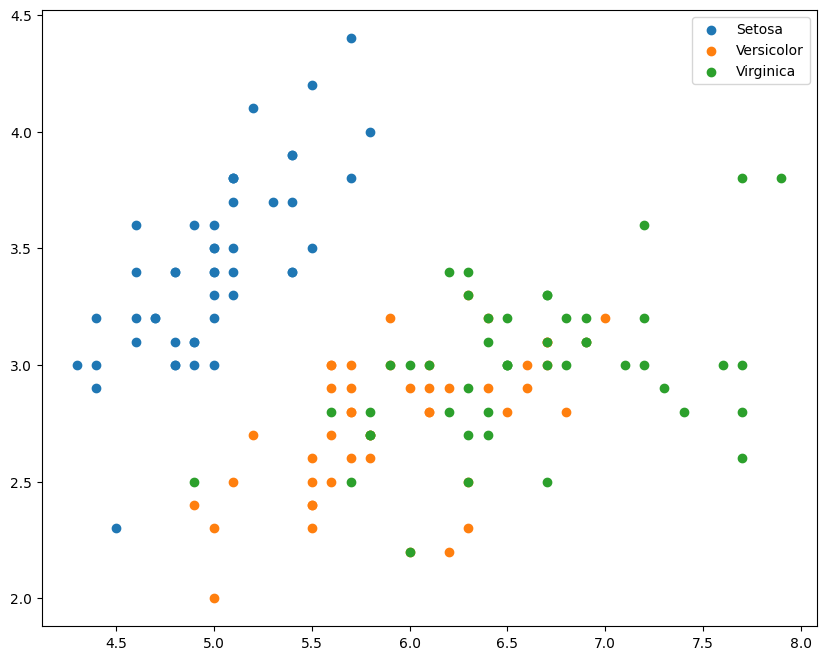

In [4]:
iris_df=pd.read_csv('./iris.csv')

training_set,testing_set=split_sets(iris_df[['sepal.length','sepal.width','variety']],9,'variety')

groups=training_set.groupby('variety')
plt.figure(figsize=(10,8))
for name,group in groups:
    plt.scatter(group['sepal.length'],group['sepal.width'],label=name)
plt.legend()

##### Inferences:
* The 'Setosa' class is easy to recognize from the plot. 
* Many of the 'Versicolor' and 'Virginica' points are clustered together. Thus KNN predictions may not give accurate results

In [5]:
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum((x1-x2)**2))
    return distance

def KNN_Classifier(testing_set,training_set,k):
    final_output=[]
    accuracy=0
    for i in testing_set.values:
        distances=[]
        for j in training_set.values:
            distances.append(euclidean_distance(i[0:len(i)-1],j[0:len(i)-1]))
        distances=np.array(distances)
        k_neighbours=[]
        for index in distances.argsort()[0:k]:
            k_neighbours.append(training_set.iloc[index])

        k_neighbours=pd.DataFrame(k_neighbours)
        prediction=''.join((k_neighbours['variety'].mode()[0]))
        final_output.append([*i,prediction])
        if(prediction==i[len(i)-1]):
            accuracy+=1

        
    new_colums=list(training_set.columns)
    new_colums.append('prediction')
    display(pd.DataFrame(final_output,columns=new_colums))
    accuracy=accuracy/len(testing_set)
    print(f"Accuracy = {accuracy}")

##### Working of the Classifier:
* The main dataframe is split into two dataframe i.e. the __training set__ and the __testing set__ using the `split_sets()` function _(the function requires that the true class column be the last column of the dataframe)_
* Now the __first n/3__ rows are placed in the testing set and the remaining in the training set
* Now the __training set__, __testing set__ and the __k-value__ are passed into the `KNN_Classifier()` function
* Now for a point in __testing set__ the distance between it and each __training set__ point is calculated and returned to a distances array and this array is argsorted
* Now from this sorted array we take the first k indices. With it we find out which points of the __training set__ are the k-nearest neighbours. Now we take of the true class column from the k-neighbours dataframe and get it's mode. Which will give us the most common value
* We set the predicted class of that __testing set__ point to be the mode
* Now we repeat the above process for the remaing points. At the end we compare the predicted class with the true class of each __training set__ point and print out the accuray

In [6]:
KNN_Classifier(testing_set=testing_set,training_set=training_set,k=3)
KNN_Classifier(testing_set=testing_set,training_set=training_set,k=10)

,sepal.length,sepal.width,variety,prediction
0,5.1,3.5,Setosa,Setosa
1,5.2,3.5,Setosa,Setosa
2,5.2,3.4,Setosa,Setosa
3,6.0,3.4,Versicolor,Virginica
4,5.4,3.0,Versicolor,Versicolor
5,6.0,2.7,Versicolor,Versicolor
6,6.1,2.6,Virginica,Versicolor
7,6.3,2.8,Virginica,Virginica
8,6.4,2.8,Virginica,Virginica


Accuracy = 0.7777777777777778


,sepal.length,sepal.width,variety,prediction
0,5.1,3.5,Setosa,Setosa
1,5.2,3.5,Setosa,Setosa
2,5.2,3.4,Setosa,Setosa
3,6.0,3.4,Versicolor,Virginica
4,5.4,3.0,Versicolor,Versicolor
5,6.0,2.7,Versicolor,Versicolor
6,6.1,2.6,Virginica,Versicolor
7,6.3,2.8,Virginica,Versicolor
8,6.4,2.8,Virginica,Virginica


Accuracy = 0.6666666666666666


,sepal.length,sepal.width,variety,prediction
0,5.1,3.5,Setosa,Setosa
1,5.2,3.5,Setosa,Setosa
2,5.2,3.4,Setosa,Setosa
3,6.0,3.4,Versicolor,Versicolor
4,5.4,3.0,Versicolor,Setosa
5,6.0,2.7,Versicolor,Versicolor
6,6.1,2.6,Virginica,Versicolor
7,6.3,2.8,Virginica,Versicolor
8,6.4,2.8,Virginica,Versicolor


Accuracy = 0.5555555555555556


##### Inference:
* Higher k-value does not mean better accuracy

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(training_set[['sepal.length','sepal.width']],training_set['variety'])
y_pred=knn.predict(testing_set[['sepal.length','sepal.width']])
print(y_pred)
accuracy=accuracy_score(testing_set['variety'],y_pred)
print("Accuracy: ",accuracy)

['Setosa' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor'
 'Versicolor' 'Virginica' 'Virginica']
Accuracy:  0.7777777777777778


In [8]:
training_set,testing_set=split_sets(iris_df,9,'variety')

KNN_Classifier(testing_set=testing_set,training_set=training_set,k=3)
KNN_Classifier(testing_set=testing_set,training_set=training_set,k=100)

,sepal.length,sepal.width,petal.length,petal.width,variety,prediction
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,5.2,3.5,1.5,0.2,Setosa,Setosa
2,5.2,3.4,1.4,0.2,Setosa,Setosa
3,6.0,3.4,4.5,1.6,Versicolor,Versicolor
4,5.4,3.0,4.5,1.5,Versicolor,Versicolor
5,6.0,2.7,5.1,1.6,Versicolor,Virginica
6,6.1,2.6,5.6,1.4,Virginica,Virginica
7,6.3,2.8,5.1,1.5,Virginica,Virginica
8,6.4,2.8,5.6,2.2,Virginica,Virginica


Accuracy = 0.8888888888888888


,sepal.length,sepal.width,petal.length,petal.width,variety,prediction
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,5.2,3.5,1.5,0.2,Setosa,Setosa
2,5.2,3.4,1.4,0.2,Setosa,Setosa
3,6.0,3.4,4.5,1.6,Versicolor,Versicolor
4,5.4,3.0,4.5,1.5,Versicolor,Versicolor
5,6.0,2.7,5.1,1.6,Versicolor,Versicolor
6,6.1,2.6,5.6,1.4,Virginica,Versicolor
7,6.3,2.8,5.1,1.5,Virginica,Versicolor
8,6.4,2.8,5.6,2.2,Virginica,Versicolor


Accuracy = 0.6666666666666666


##### Inference:
* The more correlated data the better the prediction